# Classification of X-ray Lung Images

One of the portfolio projects from Codecademy Tensorflow course.

The task was to classify x-rays of human lungs into 3 categories: covid, pneumonia and healthy.

Images are black and white, small and taken from real datasets.

Data already had been split into training and test sets, provided by Codecademy.

## **Load relevant coding libraries and the dataset**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import os
import shutil


#3 classes, multiclassification problem, 137 images of each, black and white images so grayscale mode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/covid19_dataset/test.zip" -d "/content"

Archive:  /content/drive/MyDrive/covid19_dataset/test.zip
   creating: /content/test/
  inflating: /content/__MACOSX/._test  
  inflating: /content/test/.DS_Store  
  inflating: /content/__MACOSX/test/._.DS_Store  
   creating: /content/test/Pneumonia/
  inflating: /content/__MACOSX/test/._Pneumonia  
   creating: /content/test/Normal/
  inflating: /content/__MACOSX/test/._Normal  
   creating: /content/test/Covid/
  inflating: /content/__MACOSX/test/._Covid  
  inflating: /content/test/Pneumonia/59.png  
  inflating: /content/__MACOSX/test/Pneumonia/._59.png  
  inflating: /content/test/Pneumonia/14.png  
  inflating: /content/__MACOSX/test/Pneumonia/._14.png  
  inflating: /content/test/Pneumonia/29.png  
  inflating: /content/__MACOSX/test/Pneumonia/._29.png  
  inflating: /content/test/Pneumonia/12.png  
  inflating: /content/__MACOSX/test/Pneumonia/._12.png  
  inflating: /content/test/Pneumonia/21.png  
  inflating: /content/__MACOSX/test/Pneumonia/._21.png  
  inflating: /conten

In [ ]:
!unzip "/content/drive/MyDrive/covid19_dataset/train.zip" -d "/content"

Archive:  /content/drive/MyDrive/covid19_dataset/train.zip
   creating: /content/train/
  inflating: /content/__MACOSX/._train  
  inflating: /content/train/.DS_Store  
  inflating: /content/__MACOSX/train/._.DS_Store  
   creating: /content/train/Pneumonia/
  inflating: /content/__MACOSX/train/._Pneumonia  
   creating: /content/train/Normal/
  inflating: /content/__MACOSX/train/._Normal  
   creating: /content/train/Covid/
  inflating: /content/__MACOSX/train/._Covid  
  inflating: /content/train/Pneumonia/162.png  
  inflating: /content/__MACOSX/train/Pneumonia/._162.png  
  inflating: /content/train/Pneumonia/77.png  
  inflating: /content/__MACOSX/train/Pneumonia/._77.png  
  inflating: /content/train/Pneumonia/201.png  
  inflating: /content/__MACOSX/train/Pneumonia/._201.png  
  inflating: /content/train/Pneumonia/229.png  
  inflating: /content/__MACOSX/train/Pneumonia/._229.png  
  inflating: /content/train/Pneumonia/188.png  
  inflating: /content/__MACOSX/train/Pneumonia/._1

In [ ]:
train_path = '/content/train'
test_path = '/content/test'

In [ ]:
os.listdir(test_path)

['Pneumonia', 'Covid', '.DS_Store', 'Normal']

In [ ]:
os.listdir(train_path)

['Pneumonia', 'Covid', '.DS_Store', 'Normal']

## **Inspect Example Image and Average Dimensions**

In [ ]:
os.listdir(train_path+'/Covid/')[0]

'198.png'

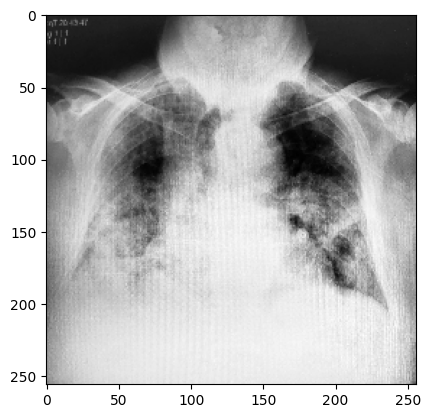

In [ ]:
covid_im_path = train_path+'/Covid/'+os.listdir(train_path+'/Covid/')[0]
covid = plt.imread(covid_im_path)
plt.imshow(covid)

In [ ]:
covid.shape

(256, 256, 4)

In [ ]:
covid.max()

1.0

In [ ]:
covid.min()

0.0

In [ ]:
covid.mean()

0.73394036

In [ ]:
image_width = 256
image_height = 256
image_shape = (256, 256, 1)

In [ ]:
class_mode = 'categorical'
color_mode = 'grayscale'
target_size = (image_width, image_height)
batch_size = 32

## **Creating Image Generator and Image Modification**

Image generator loads images into the model using batches, so 32 images at a time.

I also modified every image to create additional data for the model, using small modification such as zoom in by 10%, horizontal and width shifts of 5%, and rotation by 20 degrees.

Standard normalization of images by dividing each image by 255.

In [ ]:
train_image_gen = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.1,
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
)

In [ ]:
val_image_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen = train_image_gen.flow_from_directory(train_path, class_mode='categorical', color_mode='grayscale', batch_size=32, shuffle=True)

Found 251 images belonging to 3 classes.


In [ ]:
val_gen = val_image_gen.flow_from_directory(test_path, class_mode='categorical', color_mode='grayscale', batch_size=32)

Found 66 images belonging to 3 classes.


# **Creating The CNN Model**

After trial and error, the model with highest accuracy has 2 CNN layers, and 2 MaxPooling 2D.

I also added a dropout layer of 50% to randomise the images a bit more in each dataset and maximise learning. Then flatten before the final Dense layer.

Final layer of Dense with 3 neurons as there are 3 classes, softmax activation, Categorical loss for classification problem, Adam optimizer since it's the best.

In [ ]:
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [ ]:
model = Sequential()

#input layer
model.add(Input(shape=image_shape))

#stride 1 and maxpooling2D pool size also (1,1), kernel size = 3x3, padding=same
#conv block
model.add(Conv2D(64, 3, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(32, 3, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

#model.add(Conv2D(32, 3, 1, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(1,1), strides=(1,1)))


model.add(Flatten())

model.add(Dense(3, activation='softmax'))


In [ ]:
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import AUC, CategoricalAccuracy

In [ ]:
my_opt = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss=CategoricalCrossentropy(), optimizer=my_opt, metrics=[CategoricalAccuracy(), AUC()])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 64)      640       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)      

In [ ]:
from keras.callbacks import EarlyStopping

Mode min to minimise the validation loss, monitor validation accuracy.

In [ ]:
es = EarlyStopping(monitor='val_categorical_accuracy', mode='min', verbose=1, patience=5)

## **Training My Model**

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=train_gen.samples/batch_size,
                    epochs=30,
                    validation_data=val_gen,
                    validation_steps=val_gen.samples/batch_size,
                    callbacks=[es])

Epoch 1/30
7/7 [==============================] - 3s 333ms/step - loss: 0.2856 - categorical_accuracy: 0.9044 - auc_12: 0.9755 - val_loss: 0.5885 - val_categorical_accuracy: 0.7879 - val_auc_12: 0.9224
Epoch 2/30
7/7 [==============================] - 3s 422ms/step - loss: 0.3695 - categorical_accuracy: 0.8566 - auc_12: 0.9603 - val_loss: 0.6522 - val_categorical_accuracy: 0.7424 - val_auc_12: 0.8922
Epoch 3/30
7/7 [==============================] - 3s 418ms/step - loss: 0.2892 - categorical_accuracy: 0.8964 - auc_12: 0.9787 - val_loss: 0.6186 - val_categorical_accuracy: 0.7273 - val_auc_12: 0.9141
Epoch 4/30
7/7 [==============================] - 2s 309ms/step - loss: 0.2753 - categorical_accuracy: 0.9084 - auc_12: 0.9775 - val_loss: 0.7199 - val_categorical_accuracy: 0.7727 - val_auc_12: 0.9072
Epoch 5/30
7/7 [==============================] - 3s 314ms/step - loss: 0.3128 - categorical_accuracy: 0.8566 - auc_12: 0.9728 - val_loss: 0.6558 - val_categorical_accuracy: 0.6970 - val_auc_1

In [ ]:
from keras.models import load_model

# **Assessing The Performance of My Model**

I am looking at the performance of my model in various ways:



1.   plotting metrics calculated during training and validation of the model
2.   comparing predictions and actual test dataset
3.   looking at performance metrics per class


In [ ]:
pred = model.predict(val_gen)

3/3 [==============================] - 0s 56ms/step


In [ ]:
acc = history.history['categorical_accuracy']

val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

auc = history.history['auc_12']

val_auc = history.history['val_auc_12']

epochs = range(len(acc))


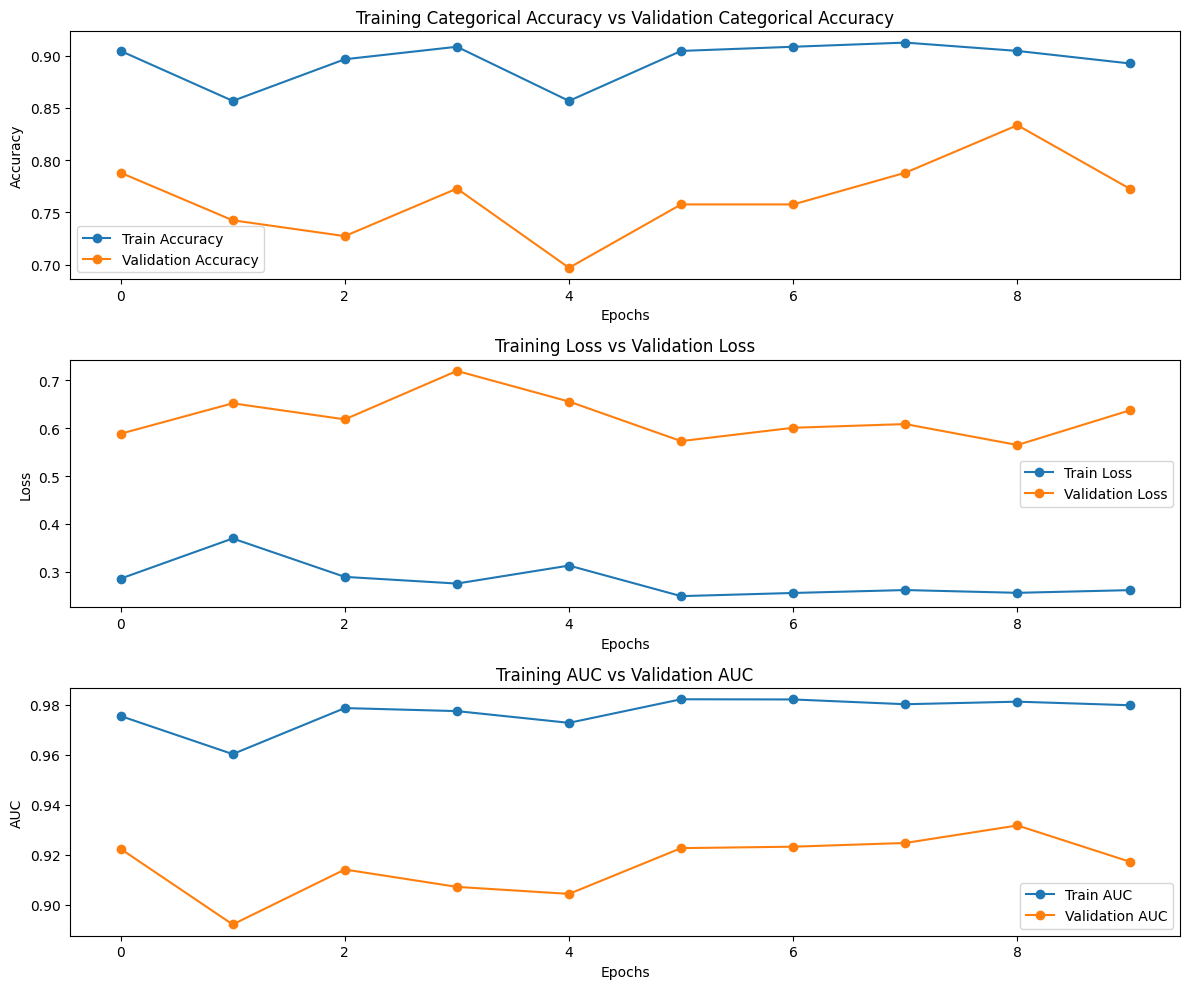

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Categorical Accuracy vs Validation Categorical Accuracy')
ax[0].plot(acc, 'o-', label='Train Accuracy')
ax[0].plot(val_acc, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training Loss vs Validation Loss')
ax[1].plot(loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Training AUC vs Validation AUC')
ax[2].plot(auc, 'o-', label='Train AUC')
ax[2].plot(val_auc, 'o-', label='Validation AUC')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('AUC')
ax[2].legend(loc='best')


plt.tight_layout()
plt.show()

In [ ]:
model.evaluate_generator(val_gen)

<ipython-input-155-ccf60d6fa38d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_gen)


[0.6372785568237305, 0.7727272510528564, 0.9172980189323425]

In [ ]:
test_loss, test_accuracy, test_auc = model.evaluate(val_gen, batch_size=32)

3/3 [==============================] - 0s 56ms/step - loss: 0.6373 - categorical_accuracy: 0.7727 - auc_12: 0.9173


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

Test Loss:     0.6372785568237305
Test Accuracy: 0.7727272510528564
Test AUC: 0.9172980189323425


In [ ]:
val_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
print(val_gen.class_indices)

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}


In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_true, y_pred))

[[ 8 11  7]
 [ 6  7  7]
 [ 6  7  7]]


In [ ]:
labels = {value: key for key, value in val_gen.class_indices.items()}

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

       Covid       0.40      0.31      0.35        26
      Normal       0.28      0.35      0.31        20
   Pneumonia       0.33      0.35      0.34        20

    accuracy                           0.33        66
   macro avg       0.34      0.34      0.33        66
weighted avg       0.34      0.33      0.33        66



The accuracy, prediction, AUC for both training and test sets are all very high, but *precision, recall, f1 score per class are low*.

I am a bit confused why the model did so poorly for each class.

The model was the most precise when it comes to classifying the Covid class, but had higher recall for pneumonia and healthy lung classes.